In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [2]:
PATH = 'cluster_data/clusterData_no_light_29_03_22/0'

drop_columns = ['max_abs', 'name']

In [3]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

df = df.drop(columns=drop_columns)

df.region = df.region.map({0: 0, 1: 1, 3: 1, 4: 1})  # sub areas in CA1 are still CA1

df.region = df.region * 2
df['Label X Region'] = df.label + df.region
df['Label'] = df.label  # just for capitalization

df.Label = df.Label.map({1: 'PYR', 0: 'PV'})
df['Label X Region'] = df['Label X Region'].map({0: 'NEO_PV', 1: 'NEO_PYR', 2: 'CA1_PV', 3: 'CA1_PYR'})

In [4]:
def change_col(df, feature):
    #  converting features from their initial values to physical values
    #  1.6 is the time in ms of each waveform
    #  256 is the number of samples in the upsampled waveform
    conversion = 1.6 / 256 
    if feature in ['dep_sd', 'fzc_sd', 'szc_sd']: # 
        df[feature] = df[feature] * conversion * 1000 # micro seconds
    elif feature in ['fwhm', 'max_speed', 'trough2peak', 'rise_coef']:
        df[feature] = df[feature] * conversion # ms
    elif feature in ['dep_red', 'fzc_red', 'szc_red']:
        df[feature] = df[feature] * (conversion ** 2) * 1000 # 10^3 (micro s)^2
    elif feature in ['dep_graph_avg_speed', 'dep_graph_slowest_path', 'dep_graph_fastest_path', 
                     'fzc_graph_avg_speed', 'fzc_graph_slowest_path', 'fzc_graph_fastest_path',
                     'szc_graph_avg_speed', 'szc_graph_slowest_path', 'szc_graph_fastest_path']:
        df[feature] = (df[feature] * (1 / conversion)) / 1000 # m/s
    elif feature == 'rise_time':
        #  16 = 2 (bins in ms) * 8 (upsampling factor)
        df[feature] = df[feature] / 16 # ms      

In [11]:
def calc_aw(a, b):
    a, b = a.copy(), b.copy()
    a.sort()
    b.sort()

    na = len(a)
    nb = len(b)

    smaller = np.median(a) < np.median(b)
    aw = 0
    for v in a:
        if smaller:
            aw_v = (v < b).sum() + 0.5 * (b == v).sum()
        else:
            aw_v = (v > b).sum() + 0.5 * (b == v).sum()
        aw += aw_v / nb
        if (aw_v / nb) > 1:
            raise AssertionError
    return aw / na

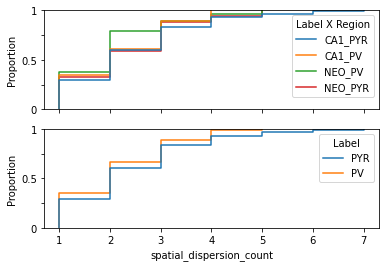

Median of pyramidal spatial_dispersion_count column is 2.0 [1.0, 3.0]
Median of pv spatial_dispersion_count column is 2.0 [1.0, 3.0]
Mann-Whitney statistical test results for feature spatial_dispersion_count are p-value=0.05947074375001624
Effect size is 0.5482281804822828


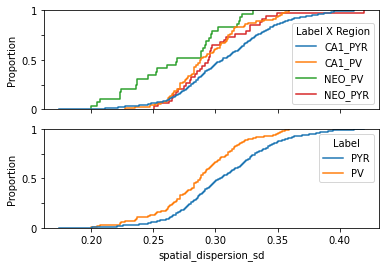

Median of pyramidal spatial_dispersion_sd column is 0.3039284703904997 [0.2803524278702199, 0.33199647480016214]
Median of pv spatial_dispersion_sd column is 0.2876386730046274 [0.26684181147359354, 0.3098306369233389]
Mann-Whitney statistical test results for feature spatial_dispersion_sd are p-value=3.01903110500074e-06
Effect size is 0.6452265664522658


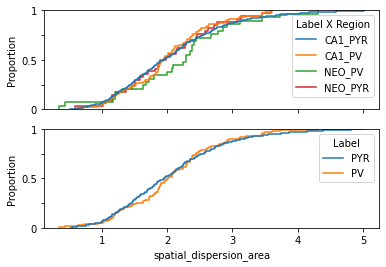

Median of pyramidal spatial_dispersion_area column is 1.949758789760716 [1.4500550096864977, 2.53989779183307]
Median of pv spatial_dispersion_area column is 2.0183725445234524 [1.6351879580259716, 2.4400172071542947]
Mann-Whitney statistical test results for feature spatial_dispersion_area are p-value=0.28902062630204317
Effect size is 0.5178627351786285


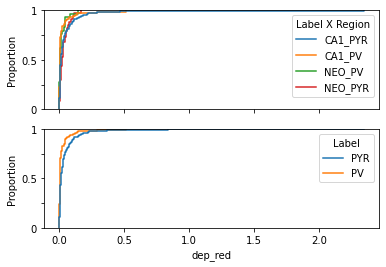

Median of pyramidal dep_red column is 0.01329694475446429 [0.004037221272786461, 0.041961669921875014]
Median of pv dep_red column is 0.006103515625000002 [0.0019073486328125009, 0.013732910156250007]
Mann-Whitney statistical test results for feature dep_red are p-value=7.042182987126458e-06
Effect size is 0.6393606513936069


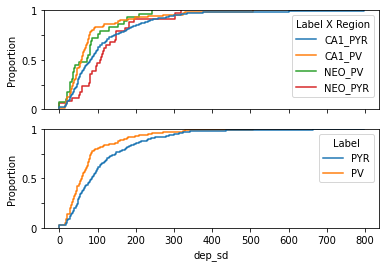

Median of pyramidal dep_sd column is 84.38464451051902 [48.28054688117649, 147.06264331592183]
Median of pv dep_sd column is 58.593750000000014 [33.829117335329634, 82.86407592029855]
Mann-Whitney statistical test results for feature dep_sd are p-value=3.4367200747665275e-05
Effect size is 0.6277492712774948


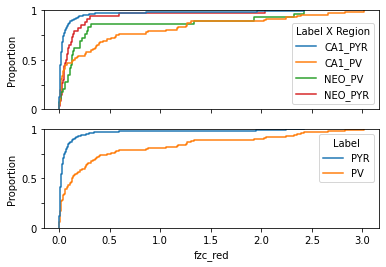

Median of pyramidal fzc_red column is 0.017293294270833343 [0.005158923921130954, 0.054205031622023836]
Median of pv fzc_red column is 0.1299176897321429 [0.01918247767857144, 0.46946207682291685]
Mann-Whitney statistical test results for feature fzc_red are p-value=6.472043841153294e-14
Effect size is 0.7376960323769607


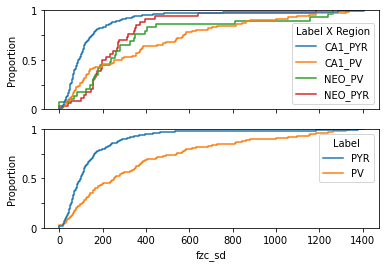

Median of pyramidal fzc_sd column is 99.59022487485909 [55.24271728019904, 164.56915663651688]
Median of pv fzc_sd column is 253.90625 [108.81553341550095, 539.2323102105437]
Mann-Whitney statistical test results for feature fzc_sd are p-value=2.295968192772649e-12
Effect size is 0.7220013972200136


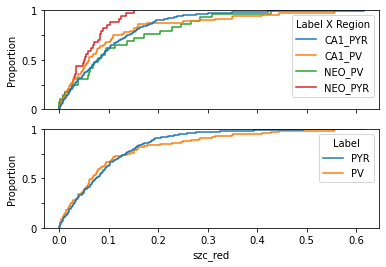

Median of pyramidal szc_red column is 0.07438659667968753 [0.03021240234375001, 0.13478597005208334]
Median of pv szc_red column is 0.06612141927083338 [0.02659388950892858, 0.1359939575195313]
Mann-Whitney statistical test results for feature szc_red are p-value=0.33957471068946776
Effect size is 0.5132856351328563


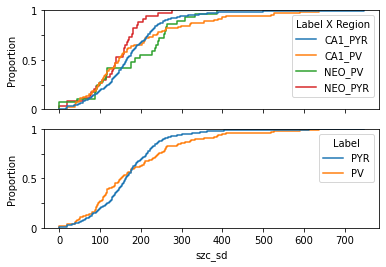

Median of pyramidal szc_sd column is 162.75520824999734 [117.51652465242064, 214.62168921714763]
Median of pv szc_sd column is 150.72704300508107 [97.43899444723806, 243.16210152321747]
Mann-Whitney statistical test results for feature szc_sd are p-value=0.47471106480328346
Effect size is 0.5020476500204767


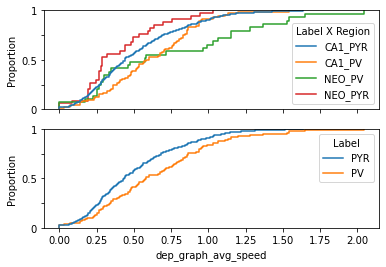

Median of pyramidal dep_graph_avg_speed column is 0.43586042384586154 [0.26861704003133835, 0.6831369931204186]
Median of pv dep_graph_avg_speed column is 0.5814151427972171 [0.3477624823922032, 0.8619662491086432]
Mann-Whitney statistical test results for feature dep_graph_avg_speed are p-value=0.00031341921359938135
Effect size is 0.6097540410975402


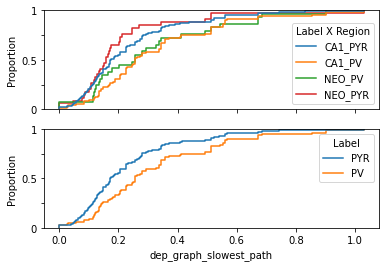

Median of pyramidal dep_graph_slowest_path column is 0.17151787726712986 [0.1143452515114199, 0.28072591615310477]
Median of pv dep_graph_slowest_path column is 0.25727681590069484 [0.1465993111330724, 0.41164290544111176]
Mann-Whitney statistical test results for feature dep_graph_slowest_path are p-value=1.4038612210464578e-05
Effect size is 0.6344101563441025


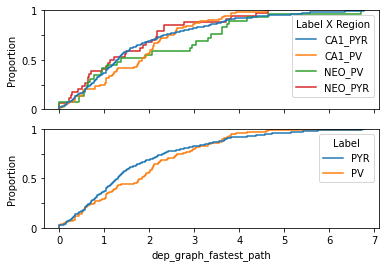

Median of pyramidal dep_graph_fastest_path column is 1.296525718003173 [0.6721429066157787, 2.3098605254184585]
Median of pv dep_graph_fastest_path column is 1.8427886754587957 [0.7877535992651911, 2.6159190533484953]
Mann-Whitney statistical test results for feature dep_graph_fastest_path are p-value=0.059744876513023994
Effect size is 0.5499747054997475


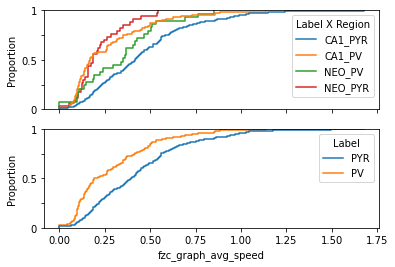

Median of pyramidal fzc_graph_avg_speed column is 0.39293393732852194 [0.21868170828319594, 0.5614518323062095]
Median of pv fzc_graph_avg_speed column is 0.19304528492326542 [0.10953700766895119, 0.4124733021860276]
Mann-Whitney statistical test results for feature fzc_graph_avg_speed are p-value=1.6546400722700303e-08
Effect size is 0.677290356772904


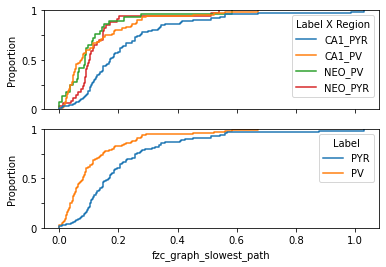

Median of pyramidal fzc_graph_slowest_path column is 0.16799238077960554 [0.1051637472400625, 0.25917330749832274]
Median of pv fzc_graph_slowest_path column is 0.0791620972002138 [0.042879469316782465, 0.14848000000000003]
Mann-Whitney statistical test results for feature fzc_graph_slowest_path are p-value=1.0425707073731018e-13
Effect size is 0.7356483823564827


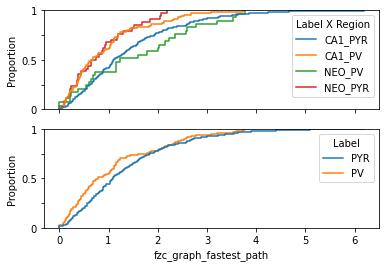

Median of pyramidal fzc_graph_fastest_path column is 1.083591430498111 [0.5729840958204544, 1.8423134885793815]
Median of pv fzc_graph_fastest_path column is 0.7854416733456837 [0.38679757595475756, 1.5912763630558198]
Mann-Whitney statistical test results for feature fzc_graph_fastest_path are p-value=0.005253424018689419
Effect size is 0.5821228108212284


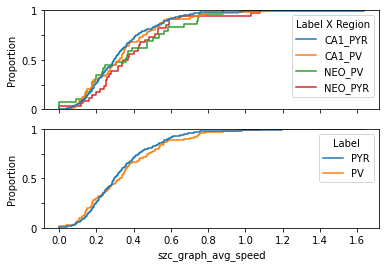

Median of pyramidal szc_graph_avg_speed column is 0.295101015960525 [0.1972569434983999, 0.42796579071258956]
Median of pv szc_graph_avg_speed column is 0.3255881565692432 [0.17599528493730782, 0.4716214473768152]
Mann-Whitney statistical test results for feature szc_graph_avg_speed are p-value=0.3426049767562815
Effect size is 0.5130206451302052


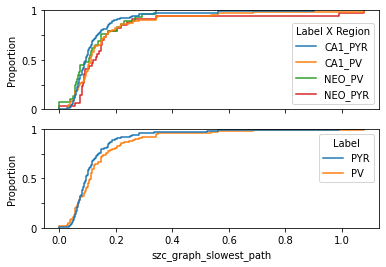

Median of pyramidal szc_graph_slowest_path column is 0.09355520578207084 [0.06829999186595037, 0.1396232579960473]
Median of pv szc_graph_slowest_path column is 0.11225998978319236 [0.06548499404019553, 0.16391998047828094]
Mann-Whitney statistical test results for feature szc_graph_slowest_path are p-value=0.08023485690088611
Effect size is 0.5450483004504828


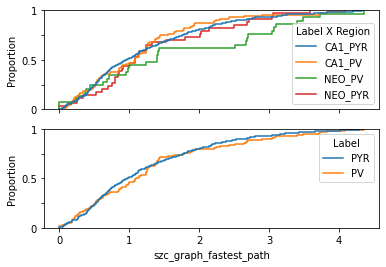

Median of pyramidal szc_graph_fastest_path column is 0.9680799023914046 [0.5231353723279476, 1.778447928865125]
Median of pv szc_graph_fastest_path column is 1.1021866703012633 [0.5179783578843966, 1.7690508395439781]
Mann-Whitney statistical test results for feature szc_graph_fastest_path are p-value=0.3274279399719764
Effect size is 0.514357640143576


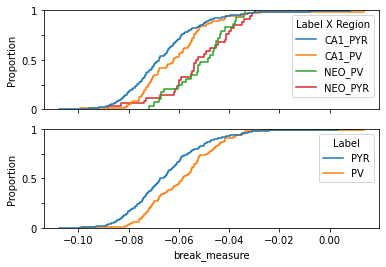

Median of pyramidal break_measure column is -0.06740300483065009 [-0.07585017319496175, -0.05636417833471949]
Median of pv break_measure column is -0.05851787550397002 [-0.07009899023265276, -0.0492752908563127]
Mann-Whitney statistical test results for feature break_measure are p-value=7.850489590692033e-06
Effect size is 0.6386018163860184


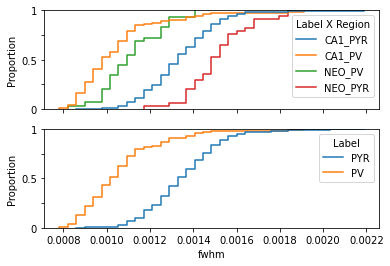

Median of pyramidal fwhm column is 0.0013281250000000003 [0.0012500000000000002, 0.0014453125000000002]
Median of pv fwhm column is 0.001015625 [0.0009375000000000002, 0.0011328125000000001]
Mann-Whitney statistical test results for feature fwhm are p-value=3.647660494961913e-34
Effect size is 0.8885717038857209


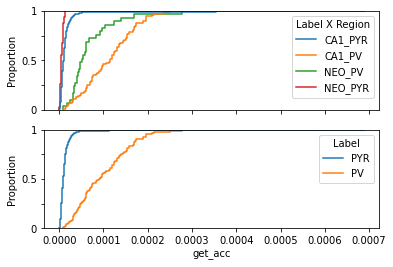

Median of pyramidal get_acc column is 8.96608924294577e-06 [5.120172753865054e-06, 1.4292867568851908e-05]
Median of pv get_acc column is 9.135971909877065e-05 [4.8578204737098e-05, 0.00013887675732008809]
Mann-Whitney statistical test results for feature get_acc are p-value=6.7986977744958744e-49
Effect size is 0.9701283997012835


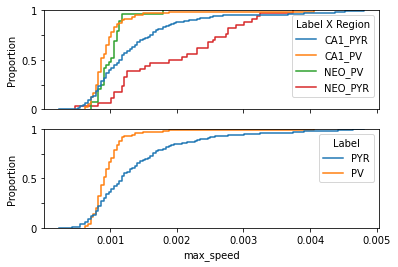

Median of pyramidal max_speed column is 0.0011718750000000002 [0.0008593750000000001, 0.0016406250000000002]
Median of pv max_speed column is 0.0008984375000000001 [0.0008203125000000001, 0.0010546875]
Mann-Whitney statistical test results for feature max_speed are p-value=3.401011980632095e-09
Effect size is 0.6858904868589054


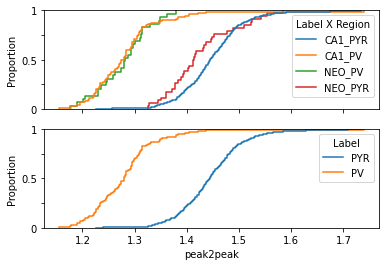

Median of pyramidal peak2peak column is 1.443493238846164 [1.4064700610447258, 1.4816126672054644]
Median of pv peak2peak column is 1.2798575554535432 [1.234690943324784, 1.3086804186665344]
Mann-Whitney statistical test results for feature peak2peak are p-value=3.661492538239374e-48
Effect size is 0.9664426296644227


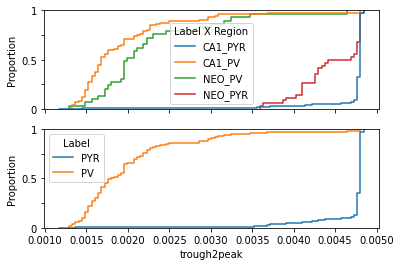

Median of pyramidal trough2peak column is 0.004804687500000001 [0.004765625000000001, 0.004804687500000001]
Median of pv trough2peak column is 0.0017968750000000003 [0.0015625, 0.0021875]
Mann-Whitney statistical test results for feature trough2peak are p-value=5.888409566454892e-58
Effect size is 0.9789092047890888


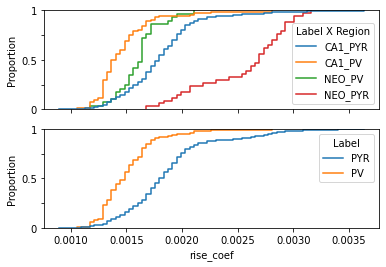

Median of pyramidal rise_coef column is 0.0017968750000000003 [0.0016015625000000003, 0.0019921875000000005]
Median of pv rise_coef column is 0.0014843750000000002 [0.0013281250000000003, 0.0016406250000000002]
Mann-Whitney statistical test results for feature rise_coef are p-value=2.15454100140333e-21
Effect size is 0.8022451880224508


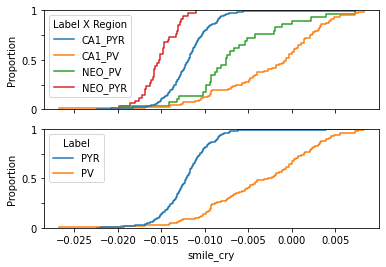

Median of pyramidal smile_cry column is -0.012122907023162606 [-0.013745582920444657, -0.010565829589556541]
Median of pv smile_cry column is -0.0027221289101205803 [-0.008634026439545223, 0.0013950600906285412]
Mann-Whitney statistical test results for feature smile_cry are p-value=5.728841300329368e-35
Effect size is 0.8941244489412438


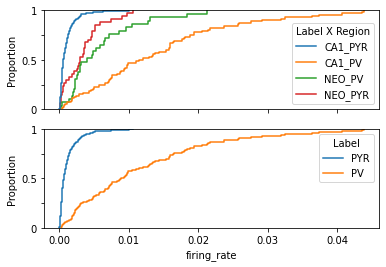

Median of pyramidal firing_rate column is 0.0006686820849674499 [0.0003520006055522299, 0.0014698247388822052]
Median of pv firing_rate column is 0.008954326342685151 [0.0033922496620757536, 0.016349134401420974]
Mann-Whitney statistical test results for feature firing_rate are p-value=1.020320052190009e-40
Effect size is 0.9271277492712767


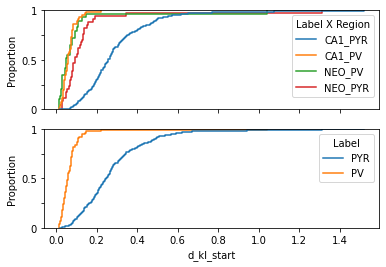

Median of pyramidal d_kl_start column is 0.2461119660987149 [0.16535870587036172, 0.3425914340572358]
Median of pv d_kl_start column is 0.058488332595699175 [0.03692354661680194, 0.0785982065910914]
Mann-Whitney statistical test results for feature d_kl_start are p-value=2.187208442695135e-44
Effect size is 0.9469297294692939


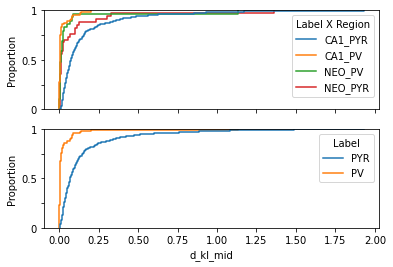

Median of pyramidal d_kl_mid column is 0.06918248108557219 [0.03206672388374797, 0.15041318225140465]
Median of pv d_kl_mid column is 0.003950466445928457 [0.001709356879618696, 0.012318641257718626]
Mann-Whitney statistical test results for feature d_kl_mid are p-value=6.056785875272988e-35
Effect size is 0.8939799089397982


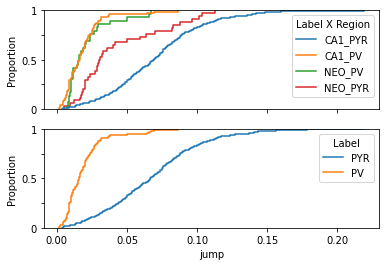

Median of pyramidal jump column is 0.06659051846046042 [0.044092939283954205, 0.08787009221329356]
Median of pv jump column is 0.015590617989256669 [0.009456312534883623, 0.02357659697139744]
Mann-Whitney statistical test results for feature jump are p-value=9.307455346395801e-39
Effect size is 0.9161667991616694


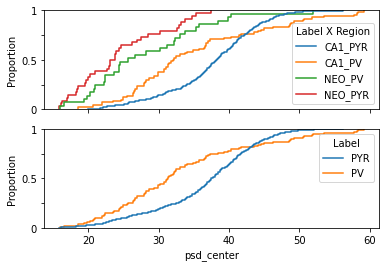

Median of pyramidal psd_center column is 37.4709754172436 [32.55193998271295, 41.679845372767275]
Median of pv psd_center column is 31.276064720708113 [26.302204688134875, 37.27640829500633]
Mann-Whitney statistical test results for feature psd_center are p-value=2.8018428488954244e-06
Effect size is 0.6457324564573268


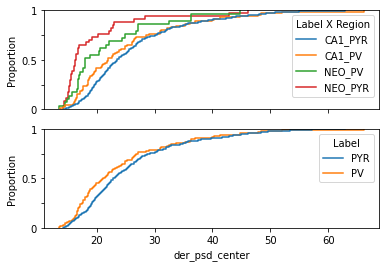

Median of pyramidal der_psd_center column is 22.908190099202642 [19.23306344655817, 28.821307000895942]
Median of pv der_psd_center column is 21.11659154319602 [17.572195583923627, 26.79598930688058]
Mann-Whitney statistical test results for feature der_psd_center are p-value=0.011925424026615335
Effect size is 0.57252294572523


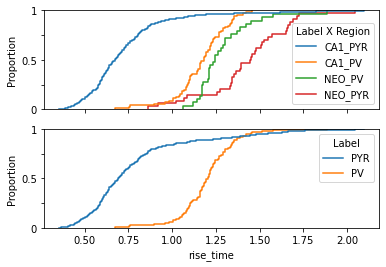

Median of pyramidal rise_time column is 0.69140625 [0.587890625, 0.85546875]
Median of pv rise_time column is 1.20703125 [1.109375, 1.2890625]
Mann-Whitney statistical test results for feature rise_time are p-value=4.33978733407594e-33
Effect size is 0.8827178338271805


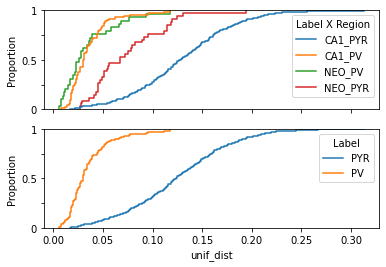

Median of pyramidal unif_dist column is 0.12343066992900475 [0.08971227847774707, 0.15921456205173112]
Median of pv unif_dist column is 0.030161165964181808 [0.020183902466827268, 0.044072063856135935]
Mann-Whitney statistical test results for feature unif_dist are p-value=1.59543507777811e-44
Effect size is 0.9476524294765246


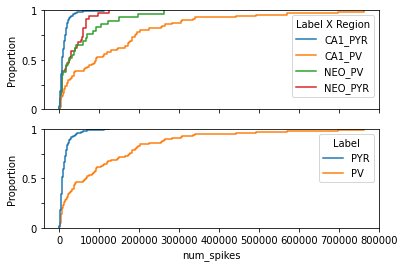

Median of pyramidal num_spikes column is 8368.0 [4494.5, 16929.0]
Median of pv num_spikes column is 66850.0 [13031.0, 174802.0]
Mann-Whitney statistical test results for feature num_spikes are p-value=8.379819894455854e-22
Effect size is 0.805629833056299


In [12]:
for feature in df.columns:
    if feature in ['region', 'label', 'Label X Region', 'Label']:
        continue
    change_col(df, feature)
    fig, ax = plt.subplots(2, sharex=True, sharey=True)
    _ = sns.ecdfplot(data=df, x=feature, hue="Label", ax=ax[1])
    _ = sns.ecdfplot(data=df, x=feature, hue="Label X Region", ax=ax[0])
    ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax[0].set_yticklabels(['0', '', '0.5', '', '1'])
    
    plt.show()
    
    col_pyr = df[feature][df.label == 1].to_numpy()
    col_pv = df[feature][df.label == 0].to_numpy()
    
    es = calc_aw(col_pyr, col_pv)
    
    pyr_median, pyr_prec25, pyr_prec75 = np.percentile(col_pyr, [50, 25, 75])
    pv_median, pv_prec25, pv_prec75 = np.percentile(col_pv, [50, 25, 75])
    
    print(f"Median of pyramidal {feature} column is {pyr_median} [{pyr_prec25}, {pyr_prec75}]")
    print(f"Median of pv {feature} column is {pv_median} [{pv_prec25}, {pv_prec75}]")
    
    statistic, p_val = stats.mannwhitneyu(col_pyr, col_pv)
    print(f"Mann-Whitney statistical test results for feature {feature} are p-value={p_val}")
    print(f"Effect size is {es}")